# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

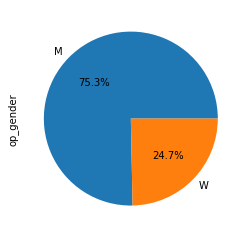

In [11]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbcongress_op_gender.png')

# show plot
plt.show()

In [12]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [13]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


Basic analysis conclusion: There are a lot more male posters. Also, the average number of responses doesn't really vary per gender. The information about the post type and op_category is interesting, but doesn't really relate to my current study.

### Analysis of Facebook Wiki

In [14]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [15]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [16]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [17]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

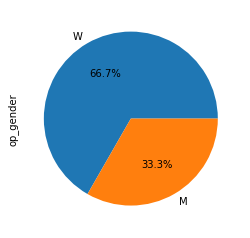

In [18]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbwiki_op_gender.png')

# show plot
plt.show()

In [19]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [20]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


Basic analysis conclusion: This file is set up the same as Facebook Congress, so for the same reasons, we only have a figure for op_gender. Again, the average number of responses doesn't really vary between male and female posters.

### Analysis of Fitocracy

In [21]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [22]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [23]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

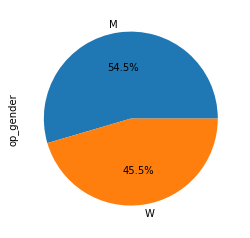

In [24]:
# plot gender
fitocracy_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_op_gender.png')

# show plot
plt.show()

In [25]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

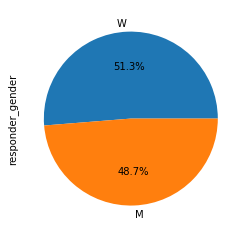

In [26]:
# plot gender
fitocracy_df.responder_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_responder_gender.png')

# show plot
plt.show()

In [27]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

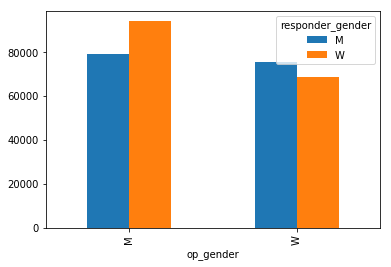

In [28]:
# plot this
fitocracy_df.groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/fit_gender_groupby.png')

# show graph
plt.show()

Basic analysis conclusion: This time, male vs. female posters/responders is much more evenly distributed. Additionally, we can see that when op_gender is male, there are more female responders than male responders and when op_gender is female, there are more male responders than female responders. This is interesting!

### Analysis of Reddit

In [29]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [30]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [31]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [35]:
# there's AskMen - is there AskWomen?
print('AskMen' in reddit_df.subreddit.values)
print('AskWomen' in reddit_df.subreddit.values)

True
False


Aw, so the AskWomen subreddit isn't even in this data set.

In [36]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

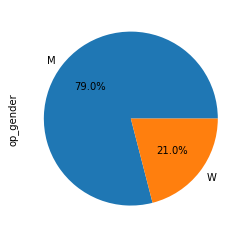

In [37]:
# plot gender
reddit_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_op_gender.png')

# show plot
plt.show()

In [38]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

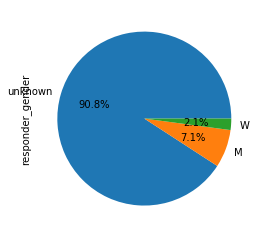

In [39]:
# plot gender
labels = ['unknown','M','W']
reddit_df.responder_gender.value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_responder_gender.png')

# show plot
plt.show()

In [40]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
# eliminating when unknown
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          M                   80705
           W                   22883
W          M                   21825
           W                    7809
Name: responder_gender, dtype: int64

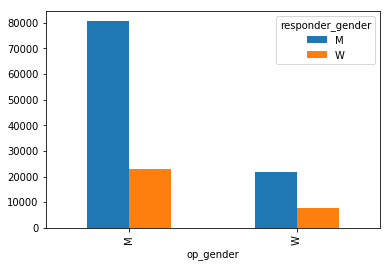

In [41]:
# plot this
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/reddit_gender_groupby.png')

# show graph
plt.show()

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit (and the lack of the AskWomen subreddit).

In [42]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


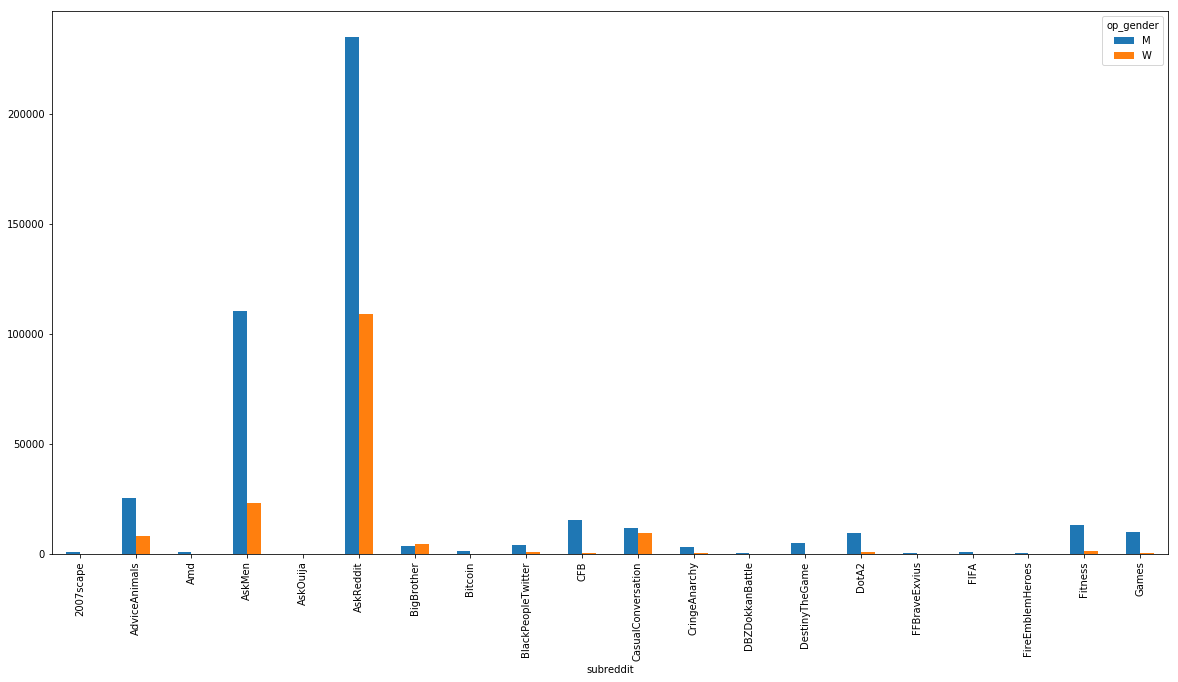

In [43]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))

# save figure
plt.savefig('images/subreddits.png')

# show graph
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio, especially in comparison to AskReddit. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [44]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

Basic analysis conclusion: With this data set, the men seem to dominate the distribution in both posters and responders. Thus, it makes sense that there are more male responders for both male and female posters.

### Analysis of TED

In [45]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [46]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

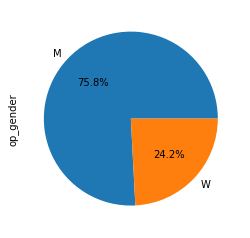

In [47]:
# plot gender
ted_responses_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/ted_op_gender.png')

# show plot
plt.show()

Basic analysis conclusion: There are a lot more male "posters" than female. Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [48]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [49]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [50]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# exclude when responses don't exist for a post
fb_congress_sample = fb_congress_df[fb_congress_df.response_text != ''].sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
507,18,video,57265377,Roger Williams,Congress_Republican,M,Janice,It's time to put Obama in the history books. W...,The ACA is not unpopular and you are supposed ...
895,22,video,57265377,Roger Williams,Congress_Republican,M,Ed,"Recently, President George H. and Barbara Bush...",not a new world order fan sorry
1187,32,video,57265377,Roger Williams,Congress_Republican,M,James,"In Texas, we're proud to say Merry Christmas.",Merry Christmas from North East Texas ... Go...
1323,32,video,57265377,Roger Williams,Congress_Republican,M,Don,"In Texas, we're proud to say Merry Christmas.",Right ON
2289,69,video,57265377,Roger Williams,Congress_Republican,M,Thomas,"Thanks Hollywood, but no thanks. #NeverHillary",[[PHOTO]]


In [51]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17031
photo     14483
status     9683
video      8721
event        63
note         14
music         5
Name: post_type, dtype: int64
Congress_Republican     32116
Congress_Democratic     17254
Congress_Independent      630
Name: op_category, dtype: int64
M    37460
W    12540
Name: op_gender, dtype: int64


In [52]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [53]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
507,18,video,57265377,Roger Williams,Congress_Republican,M,Janice,It's time to put Obama in the history books. W...,The ACA is not unpopular and you are supposed ...,"[It, 's, time, to, put, Obama, in, the, histor...","[The, ACA, is, not, unpopular, and, you, are, ...",37,61
895,22,video,57265377,Roger Williams,Congress_Republican,M,Ed,"Recently, President George H. and Barbara Bush...",not a new world order fan sorry,"[Recently, ,, President, George, H., and, Barb...","[not, a, new, world, order, fan, sorry]",28,7
1187,32,video,57265377,Roger Williams,Congress_Republican,M,James,"In Texas, we're proud to say Merry Christmas.",Merry Christmas from North East Texas ... Go...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Merry, Christmas, from, North, East, Texas, ....",11,10
1323,32,video,57265377,Roger Williams,Congress_Republican,M,Don,"In Texas, we're proud to say Merry Christmas.",Right ON,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Right, ON]",11,2
2289,69,video,57265377,Roger Williams,Congress_Republican,M,Thomas,"Thanks Hollywood, but no thanks. #NeverHillary",[[PHOTO]],"[Thanks, Hollywood, ,, but, no, thanks, ., #, ...","[[, [, PHOTO, ], ]]",9,5


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.775280298985585
average post length when poster is female: 75.49776714513557


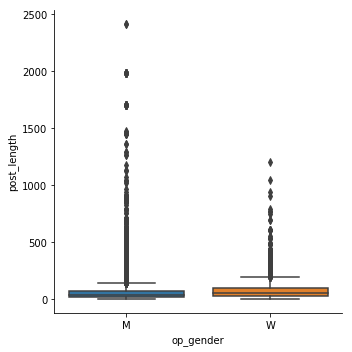

In [54]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Is this significant?

In [55]:
from scipy import stats

stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=-19.340567293680223, pvalue=8.986804024307468e-83)

Wow, very significant! We can safely conclude female posters have longer posts than male posters.

average response length when poster is male: 31.421623064602244
average response length when poster is female: 31.934848484848484


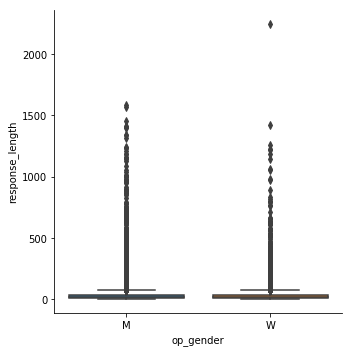

In [56]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses. Let's not bother doing a t-test here.

Onto sentence length!

In [57]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [58]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [59]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
507,18,video,57265377,Roger Williams,Congress_Republican,M,Janice,It's time to put Obama in the history books. W...,The ACA is not unpopular and you are supposed ...,"[It, 's, time, to, put, Obama, in, the, histor...","[The, ACA, is, not, unpopular, and, you, are, ...",37,61,18.5,20.333333
895,22,video,57265377,Roger Williams,Congress_Republican,M,Ed,"Recently, President George H. and Barbara Bush...",not a new world order fan sorry,"[Recently, ,, President, George, H., and, Barb...","[not, a, new, world, order, fan, sorry]",28,7,14.0,7.000000
1187,32,video,57265377,Roger Williams,Congress_Republican,M,James,"In Texas, we're proud to say Merry Christmas.",Merry Christmas from North East Texas ... Go...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Merry, Christmas, from, North, East, Texas, ....",11,10,11.0,10.000000
1323,32,video,57265377,Roger Williams,Congress_Republican,M,Don,"In Texas, we're proud to say Merry Christmas.",Right ON,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Right, ON]",11,2,11.0,2.000000
2289,69,video,57265377,Roger Williams,Congress_Republican,M,Thomas,"Thanks Hollywood, but no thanks. #NeverHillary",[[PHOTO]],"[Thanks, Hollywood, ,, but, no, thanks, ., #, ...","[[, [, PHOTO, ], ]]",9,5,4.5,5.000000


In [60]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                    \
                  count       mean       std  min    25%   50%        75%   
op_gender                                                                   
M               37460.0  16.851878  9.442592  0.0  10.75  16.0  22.333333   
W               12540.0  18.646193  8.725935  0.0  13.00  18.0  24.000000   

                 response_avg_slen                                        \
             max             count       mean        std  min  25%   50%   
op_gender                                                                  
M          176.0           37460.0  11.658330  10.708090  1.0  5.0  9.50   
W           86.0           12540.0  11.638389  10.724519  1.0  5.0  9.25   

                        
            75%    max  
op_gender               
M          15.0  666.0  
W          15.0  333.0

In [63]:
# what is this really long sentence?
fb_congress_sample[fb_congress_sample.post_avg_slen == 176.0].post_text.iloc[0]

"Markwayne Mullin sponsors and supports laws that respect life:  -Cosponsored legislation prohibiting federal funding of organizations that perform abortions or support organizations that perform abortions -Voted to prohibit any federal funding from being used to pay for abortions -Cosponsored and voted for a law to block funding for Planned Parenthood -Voted to enact a permanent, government-wide policy against funding abortions or health plans that cover abortions -Voted to block Medicaid funds from going to organizations that perform abortions and to override the president's veto of the bill -Cosponsored and voted to require medical care for babies born alive after an attempted abortion -Cosponsored the Life at Conception Act, giving constitutional protection for the unborn -Cosponsored and voted to give states the option to exclude abortion providers from the federal-state Medicaid program -Cosponsored legislation to stop Obamacare mandates compelling people to violate their religio

Ah... they just don't punctuate.

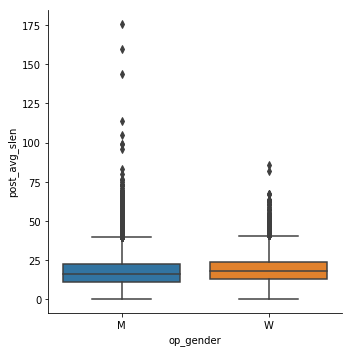

In [64]:
sns.catplot(x='op_gender', y='post_avg_slen', kind='box', data=fb_congress_sample)

Though it's hard to tell on the graph, it seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Is the fact that female posters use longer sentences significant?

In [65]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_avg_slen,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=-19.517114946736104, pvalue=3.741508845108442e-84)

This seems strange/random to me, but it is significant that female posters use longer sentences than male posters.

I decided not to examine TTR, because sometimes the responses are so short that they have a TTR of 1.Since online posts are pretty short to begin with, TTR isn't very meaninful.

Let's try average Google k-band:

In [66]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [67]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [68]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
507,18,video,57265377,Roger Williams,Congress_Republican,M,Janice,It's time to put Obama in the history books. W...,The ACA is not unpopular and you are supposed ...,"[It, 's, time, to, put, Obama, in, the, histor...","[The, ACA, is, not, unpopular, and, you, are, ...",37,61,18.5,20.333333,2.096774,2.392157
895,22,video,57265377,Roger Williams,Congress_Republican,M,Ed,"Recently, President George H. and Barbara Bush...",not a new world order fan sorry,"[Recently, ,, President, George, H., and, Barb...","[not, a, new, world, order, fan, sorry]",28,7,14.0,7.000000,2.454545,1.428571
1187,32,video,57265377,Roger Williams,Congress_Republican,M,James,"In Texas, we're proud to say Merry Christmas.",Merry Christmas from North East Texas ... Go...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Merry, Christmas, from, North, East, Texas, ....",11,10,11.0,10.000000,2.625000,3.000000
1323,32,video,57265377,Roger Williams,Congress_Republican,M,Don,"In Texas, we're proud to say Merry Christmas.",Right ON,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Right, ON]",11,2,11.0,2.000000,2.625000,1.000000
2289,69,video,57265377,Roger Williams,Congress_Republican,M,Thomas,"Thanks Hollywood, but no thanks. #NeverHillary",[[PHOTO]],"[Thanks, Hollywood, ,, but, no, thanks, ., #, ...","[[, [, PHOTO, ], ]]",9,5,4.5,5.000000,1.600000,1.000000


In [69]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35299.0  2.426083  0.837905  1.0  1.916667  2.314286   
W                12156.0  2.375285  0.725250  1.0  1.921053  2.272727   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.746032  20.0            36624.0  2.760811  2.232710  1.0   
W          2.714286  11.0            12300.0  2.744473  2.163342  1.0   

                                        
                25%     50%  75%   max  
op_gender                               
M          1.636364  2.1875  3.0  20.0  
W          1.666667  2.2000  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [70]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [71]:
# still too large for my analysis, let's reduce to 50,000 again
# again ignoring when responses don't exist
fb_wiki_sample = fb_wiki_df[fb_wiki_df.response_text != ''].sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [72]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
85,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Denise,Who forgot to pay the heat bill? Current wind ...,"Have a great weekend Byron, stay warm!!","[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Have, a, great, weekend, Byron, ,, stay, warm...",56,10
188,17,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Another summer like day tomorrow. T'storms hea...,Thank Byron for the update,"[Another, summer, like, day, tomorrow, ., T'st...","[Thank, Byron, for, the, update]",30,5
462,48,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maryann,T'storms heading this way. Severe weather is p...,"Hey Byron, if your out tonight in the storm be...","[T'storms, heading, this, way, ., Severe, weat...","[Hey, Byron, ,, if, your, out, tonight, in, th...",70,18
561,57,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Blanca,Sunny and warmer today. T'storms tomorrow. Tem...,Victor H Trujillo,"[Sunny, and, warmer, today, ., T'storms, tomor...","[Victor, H, Trujillo]",45,3
897,89,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Paul,Are you looking for the sun? Best chance to se...,Looks good I can come to the city Saturday and...,"[Are, you, looking, for, the, sun, ?, Best, ch...","[Looks, good, I, can, come, to, the, city, Sat...",78,15


average post length when poster is male: 38.53121795258491
average post length when poster is female: 28.91601591718278


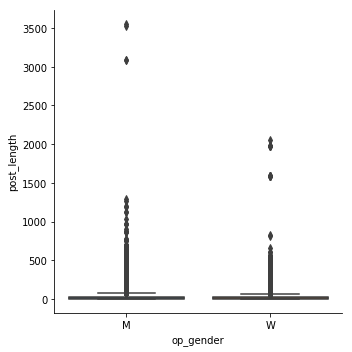

In [73]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results. Is this significant?

In [74]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=12.744131451548226, pvalue=4.510497845535041e-37)

Yes, still significant. I wonder what's going on here that it's the opposite from the Congress file. Maybe it just comes down to the fact that these are different types of people.

average response length when poster is male: 14.979670627978525
average response length when poster is female: 13.24976812374712


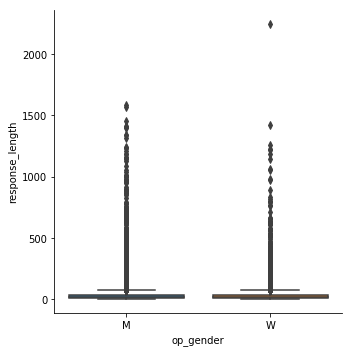

In [75]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters. Let's not bother with a t-test here.

In [76]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [77]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [78]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
85,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Denise,Who forgot to pay the heat bill? Current wind ...,"Have a great weekend Byron, stay warm!!","[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Have, a, great, weekend, Byron, ,, stay, warm...",56,10,9.333333,5.0
188,17,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Another summer like day tomorrow. T'storms hea...,Thank Byron for the update,"[Another, summer, like, day, tomorrow, ., T'st...","[Thank, Byron, for, the, update]",30,5,7.500000,5.0
462,48,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maryann,T'storms heading this way. Severe weather is p...,"Hey Byron, if your out tonight in the storm be...","[T'storms, heading, this, way, ., Severe, weat...","[Hey, Byron, ,, if, your, out, tonight, in, th...",70,18,10.000000,18.0
561,57,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Blanca,Sunny and warmer today. T'storms tomorrow. Tem...,Victor H Trujillo,"[Sunny, and, warmer, today, ., T'storms, tomor...","[Victor, H, Trujillo]",45,3,9.000000,3.0
897,89,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Paul,Are you looking for the sun? Best chance to se...,Looks good I can come to the city Saturday and...,"[Are, you, looking, for, the, sun, ?, Best, ch...","[Looks, good, I, can, come, to, the, city, Sat...",78,15,13.000000,15.0


In [79]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%       50%    75%   
op_gender                                                                 
M               16577.0  10.528580  9.382583  0.0  5.0  8.666667  14.25   
W               33423.0   9.751533  9.624459  0.0  5.5  9.000000  13.00   

                 response_avg_slen                                      \
             max             count      mean        std  min  25%  50%   
op_gender                                                                
M          375.0           16577.0  7.526728   9.253454  1.0  3.0  5.0   
W          527.0           33423.0  7.225136  10.516828  1.0  2.5  5.0   

                            
                75%    max  
op_gender                   
M          9.333333  411.0  
W          9.000000  666.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters. Let's check the significance of average sentence length though, since there is a little difference.

In [80]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_avg_slen,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=8.643468267987977, pvalue=5.6887544469321436e-18)

Wow - it's still significant! However, this time, male posters have longer sentences than female posters. It seems that this goes along with the post length. By this, I mean that in the Congress file, female posters had longer posts and longer sentences, and in the Wiki file, male posters had longer posts and longer sentences.

In [81]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
85,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Denise,Who forgot to pay the heat bill? Current wind ...,"Have a great weekend Byron, stay warm!!","[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Have, a, great, weekend, Byron, ,, stay, warm...",56,10,9.333333,5.0,2.409091,3.285714
188,17,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Another summer like day tomorrow. T'storms hea...,Thank Byron for the update,"[Another, summer, like, day, tomorrow, ., T'st...","[Thank, Byron, for, the, update]",30,5,7.500000,5.0,2.681818,3.200000
462,48,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maryann,T'storms heading this way. Severe weather is p...,"Hey Byron, if your out tonight in the storm be...","[T'storms, heading, this, way, ., Severe, weat...","[Hey, Byron, ,, if, your, out, tonight, in, th...",70,18,10.000000,18.0,3.090909,2.533333
561,57,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Blanca,Sunny and warmer today. T'storms tomorrow. Tem...,Victor H Trujillo,"[Sunny, and, warmer, today, ., T'storms, tomor...","[Victor, H, Trujillo]",45,3,9.000000,3.0,3.225806,4.000000
897,89,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Paul,Are you looking for the sun? Best chance to se...,Looks good I can come to the city Saturday and...,"[Are, you, looking, for, the, sun, ?, Best, ch...","[Looks, good, I, can, come, to, the, city, Sat...",78,15,13.000000,15.0,2.515152,1.357143


In [82]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14620.0  2.808512  1.870523  1.0  1.818182  2.400000   
W                29154.0  2.631324  1.488746  1.0  1.733333  2.307692   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.154472  20.0            15063.0  3.564438  3.394226  1.0   
W          3.071429  20.0            30462.0  3.876419  3.858271  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.526316  2.333333  4.000000  20.0  
W          1.555556  2.375000  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [83]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [84]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...
19,19,117,M,3477,M,"Ermahgerd, parhps!","I know, I've been slackin!"
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...
38,38,117,M,26833,M,Dear dude on the recumbent bike -- if you can'...,toan


So now we have both op gender and responder gender! Let's conduct some linguistic analysis.

In [85]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...,"[Incidentally, --, you, planning, to, compete,...","[It, looks, unlikely, that, I, 'll, be, able, ...",44,25
19,19,117,M,3477,M,"Ermahgerd, parhps!","I know, I've been slackin!","[Ermahgerd, ,, parhps, !]","[I, know, ,, I, 've, been, slackin, !]",4,8
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...,"[>, in, the, rack, ,, doin, ma, squatz, >, tra...","[Everyone, has, more, interesting, gym, advent...",101,11
38,38,117,M,26833,M,Dear dude on the recumbent bike -- if you can'...,toan,"[Dear, dude, on, the, recumbent, bike, --, if,...",[toan],33,1


In [86]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27201.0  17.090438  18.125925  1.0  7.0  11.0  20.0   740.0   
W             22799.0  18.678670  24.052176  1.0  8.0  11.0  22.0  2123.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27201.0  24.650858  28.995923  1.0  6.0  12.0  29.0  531.0  
W                 22799.0  27.852494  31.329844  1.0  6.0  13.0  36.0  631.0

In [87]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12572.0  16.396993  18.911665  1.0  5.0  10.0   
          W                 14629.0  31.744138  33.869291  1.0  6.0  14.0   
W         M                 11925.0  15.712201  18.331772  1.0  5.0  10.0   
          W                 10874.0  41.166176  36.750957  1.0  8.0  23.0   

                             75%    max  
op_gender responder_gender               
M         M                 20.0  531.0  
          W                 61.0  224.0  
W         M                 19.0  631.0  
          W                 86.0  188.0

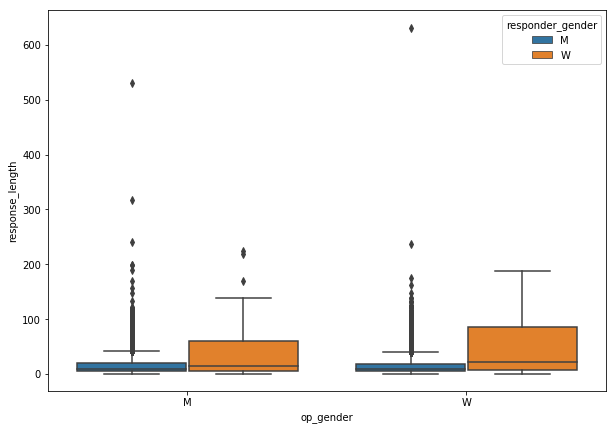

In [88]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_length_bygender.png')

# show
plt.show()

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters (responding to male is a little longer), but female responders have longer responses when responding to female than when responding to male.

Is any of this significant?

In [89]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_length,
                                                fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

ttest for post length: Ttest_indResult(statistic=-8.20676223288316, pvalue=2.3367136734187136e-16)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-11.772466480119848, pvalue=6.001809072517201e-32)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-78.22607318488933, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=2.877662639740648, pvalue=0.004009797090424888)
-----------
ttest for female responder: Ttest_indResult(statistic=-20.931544111345776, pvalue=2.3301011923316946e-96)
-----------


Yay, these are all significant! In summary:
- Female posters have longer posts than male posters
- Reponses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer posts when responding to males than when responding to females
- Female responders have longer responses when responding to females than when responding to males

Let's move on to sentence length:

In [90]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [91]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [92]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...,"[Incidentally, --, you, planning, to, compete,...","[It, looks, unlikely, that, I, 'll, be, able, ...",44,25,22.0,25.0
19,19,117,M,3477,M,"Ermahgerd, parhps!","I know, I've been slackin!","[Ermahgerd, ,, parhps, !]","[I, know, ,, I, 've, been, slackin, !]",4,8,4.0,8.0
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7,26.0,7.0
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...,"[>, in, the, rack, ,, doin, ma, squatz, >, tra...","[Everyone, has, more, interesting, gym, advent...",101,11,50.5,5.5
38,38,117,M,26833,M,Dear dude on the recumbent bike -- if you can'...,toan,"[Dear, dude, on, the, recumbent, bike, --, if,...",[toan],33,1,33.0,1.0


In [93]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                     \
                  count      mean       std  min       25%  50%        75%   
op_gender                                                                    
M               27201.0  9.240126  6.285935  1.0  5.333333  8.0  10.833333   
W               22799.0  9.320622  9.258932  1.0  5.500000  8.0  10.400000   

                  response_avg_slen                                            \
              max             count       mean       std  min  25%  50%   75%   
op_gender                                                                       
M           111.0           27201.0   9.993931  8.539774  1.0  4.0  7.0  12.0   
W          1061.5           22799.0  10.615906  9.284642  1.0  4.0  7.5  13.0   

                  
             max  
op_gender         
M          106.0  
W           89.0

In [94]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12572.0   8.291041   6.372474  1.0  4.0   
          W                 14629.0  11.457375   9.801694  1.0  4.0   
W         M                 11925.0   7.840149   6.066665  1.0  4.0   
          W                 10874.0  13.659947  11.075668  1.0  5.0   

                                  50%   75%    max  
op_gender responder_gender                          
M         M                  6.500000  11.0   74.0  
          W                  7.333333  15.0  106.0  
W         M                  6.000000  10.0   89.0  
          W                 10.250000  25.0   73.0

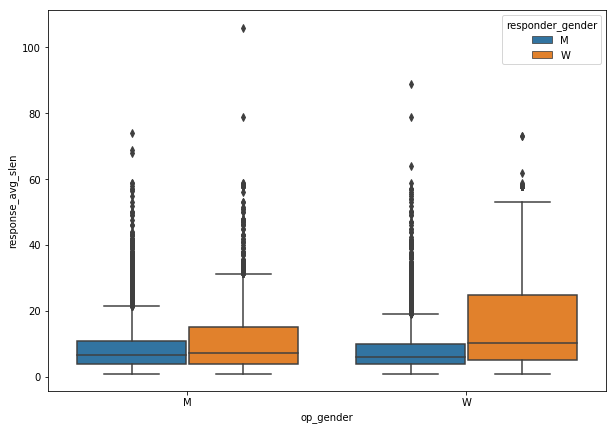

In [95]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_slen_bygender.png')

# show
plt.show()

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

Is any of this significant?

In [96]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=-1.1149150321625634, pvalue=0.2648937145023749)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-7.737215254081339, pvalue=1.036439705530524e-14)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-56.58369214223656, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=5.673334879062317, pvalue=1.416232004309515e-08)
-----------
ttest for female responder: Ttest_indResult(statistic=-16.48657611268788, pvalue=1.0706424431776372e-60)


Most of these are significant! In summary:
- There isn't a significant difference in sentence length for male vs. female posters
- Responses to female posters have longer sentences than responses to male posters (but probably by a very small amount! The mean sentence lengths were only different by 0.5...)
- Female responders have longer sentences than male responders
- Male responders have longer sentences when responding to males than when responding to females
- Female responders have longer sentences when responding to females than when responding to males

Onto k-band:

In [97]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...,"[Incidentally, --, you, planning, to, compete,...","[It, looks, unlikely, that, I, 'll, be, able, ...",44,25,22.0,25.0,1.641026,2.333333
19,19,117,M,3477,M,"Ermahgerd, parhps!","I know, I've been slackin!","[Ermahgerd, ,, parhps, !]","[I, know, ,, I, 've, been, slackin, !]",4,8,4.0,8.0,NaN,1.000000
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7,26.0,7.0,2.302326,2.714286
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...,"[>, in, the, rack, ,, doin, ma, squatz, >, tra...","[Everyone, has, more, interesting, gym, advent...",101,11,50.5,5.5,2.573529,2.500000
38,38,117,M,26833,M,Dear dude on the recumbent bike -- if you can'...,toan,"[Dear, dude, on, the, recumbent, bike, --, if,...",[toan],33,1,33.0,1.0,2.379310,NaN


In [98]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                   \
                   count      mean       std  min  25%       50%      75%   
op_gender                                                                   
M                26978.0  2.400382  1.432432  1.0  1.4  2.083333  3.02987   
W                22668.0  2.295014  1.264093  1.0  1.4  2.000000  3.00000   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            26355.0  2.373279  1.988440  1.0  1.363636   
W          20.0            22082.0  2.276245  1.934674  1.0  1.333333   

                                     
                50%       75%   max  
op_gender                            
M          1.750000  2.588235  20.0  
W          1.714286  2.411765  20.0

In [99]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12188.0  2.542448  2.158889  1.0  1.333333   
          W                 14167.0  2.227741  1.816648  1.0  1.400000   
W         M                 11475.0  2.387675  2.134093  1.0  1.230769   
          W                 10607.0  2.155696  1.684505  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.937500  2.841208  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.769231  2.666667  20.0  
          W                 1.650794  2.148148  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [100]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 152.3+ MB


In [101]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo
181,181,2007scape,DCBizzle,M,False,puddin1,,unknown_gender,Just pm me your username and password and Ill ...,Username: Savaged Pw: <3ScriptKiddie
233,233,2007scape,GUIpsp,M,False,ShadyRussian,,unknown_gender,Its not the best xp in the game by a long shot.,Best afkable melee XP. And when all other opti...
238,238,2007scape,1stonepwn,M,False,Im_Blackice,,unknown_gender,Why are people surprised that they wont post i...,Because logic has no place in this sub.
403,403,2007scape,Emperorerror,M,False,niggerslayer20,,unknown_gender,Wow so it would only be like 300 hours for 99,"only 300 hours of 2 tick woodcutting, lol."


In [102]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8
181,181,2007scape,DCBizzle,M,False,puddin1,,unknown_gender,Just pm me your username and password and Ill ...,Username: Savaged Pw: <3ScriptKiddie,"[Just, pm, me, your, username, and, password, ...","[Username, :, Savaged, Pw, :, <, 3ScriptKiddie]",16,7
233,233,2007scape,GUIpsp,M,False,ShadyRussian,,unknown_gender,Its not the best xp in the game by a long shot.,Best afkable melee XP. And when all other opti...,"[Its, not, the, best, xp, in, the, game, by, a...","[Best, afkable, melee, XP, ., And, when, all, ...",13,30
238,238,2007scape,1stonepwn,M,False,Im_Blackice,,unknown_gender,Why are people surprised that they wont post i...,Because logic has no place in this sub.,"[Why, are, people, surprised, that, they, wont...","[Because, logic, has, no, place, in, this, sub...",21,9
403,403,2007scape,Emperorerror,M,False,niggerslayer20,,unknown_gender,Wow so it would only be like 300 hours for 99,"only 300 hours of 2 tick woodcutting, lol.","[Wow, so, it, would, only, be, like, 300, hour...","[only, 300, hours, of, 2, tick, woodcutting, ,...",11,10


In [103]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39499.0  39.930960  62.472579  1.0  11.0  22.0  45.0  1964.0   
W             10501.0  48.008666  73.280881  1.0  13.0  26.0  55.0  1552.0   

          response_length                                                      
                    count      mean        std  min   25%   50%   75%     max  
op_gender                                                                      
M                 39499.0  33.98200  51.232048  1.0   9.0  19.0  39.0  1097.0  
W                 10501.0  36.97905  56.541453  1.0  10.0  20.0  42.0  1674.0

In [104]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min   25%   50%  \
op_gender responder_gender                                                  
M         M                 2769.0  34.252799  47.545920  1.0   9.0  19.0   
          W                  778.0  46.526992  67.093069  1.0  11.0  26.5   
W         M                  742.0  45.057951  69.872513  1.0  11.0  23.0   
          W                  268.0  48.268657  54.688449  1.0  16.0  29.0   

                              75%    max  
op_gender responder_gender                
M         M                 39.00  769.0  
          W                 52.00  905.0  
W         M                 51.75  983.0  
          W                 60.00  416.0

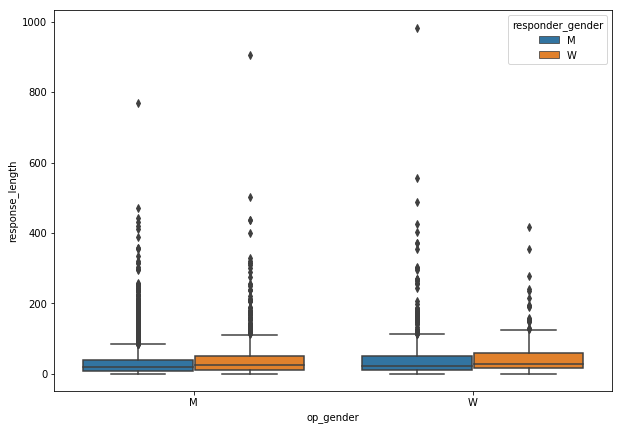

In [105]:
# plot (ignoring when responder gender is unknown)
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_length_bygender.png')

# show
plt.show()

It's hard to tell from the boxplot, but from looking at the actual data, we can summarize some information:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly (and opposite of our fitocracy data), male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

Is any of this significant?

In [106]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_length,
                                                reddit_sample[reddit_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))

ttest for post length: Ttest_indResult(statistic=-10.340778072004092, pvalue=5.604250235804072e-25)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-4.9211951167560155, pvalue=8.69072106429625e-07)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-4.794943320976557, pvalue=1.7889149195850977e-06)
-----------
ttest for male responder: Ttest_indResult(statistic=-3.973088838795429, pvalue=7.641723847957936e-05)
-----------
ttest for female responder: Ttest_indResult(statistic=-0.42309111396270965, pvalue=0.6723901826977612)


Again, most of these are significant. In summary:
- Female posters have longer posts than male posters
- Responses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer responses when responding to females than when responding to males
- There isn't a significant difference in female response length when responding to males vs. females

Onto sentence length:

In [107]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [108]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [109]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.0
181,181,2007scape,DCBizzle,M,False,puddin1,,unknown_gender,Just pm me your username and password and Ill ...,Username: Savaged Pw: <3ScriptKiddie,"[Just, pm, me, your, username, and, password, ...","[Username, :, Savaged, Pw, :, <, 3ScriptKiddie]",16,7,16.000000,7.0
233,233,2007scape,GUIpsp,M,False,ShadyRussian,,unknown_gender,Its not the best xp in the game by a long shot.,Best afkable melee XP. And when all other opti...,"[Its, not, the, best, xp, in, the, game, by, a...","[Best, afkable, melee, XP, ., And, when, all, ...",13,30,13.000000,15.0
238,238,2007scape,1stonepwn,M,False,Im_Blackice,,unknown_gender,Why are people surprised that they wont post i...,Because logic has no place in this sub.,"[Why, are, people, surprised, that, they, wont...","[Because, logic, has, no, place, in, this, sub...",21,9,21.000000,9.0
403,403,2007scape,Emperorerror,M,False,niggerslayer20,,unknown_gender,Wow so it would only be like 300 hours for 99,"only 300 hours of 2 tick woodcutting, lol.","[Wow, so, it, would, only, be, like, 300, hour...","[only, 300, hours, of, 2, tick, woodcutting, ,...",11,10,11.000000,10.0


In [110]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               39499.0  13.481618  8.430351  1.0  8.0  12.0  17.363636   
W               10501.0  13.771372  8.957489  1.0  8.0  12.5  18.000000   

                 response_avg_slen                                       \
             max             count       mean       std  min  25%   50%   
op_gender                                                                 
M          220.0           39499.0  12.693110  9.029443  1.0  7.0  11.0   
W          330.5           10501.0  12.773145  8.489093  1.0  7.0  11.0   

                         
             75%    max  
op_gender                
M          16.75  632.0  
W          17.00  165.0

In [111]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min    25%  \
op_gender responder_gender                                             
M         M                 2769.0  12.452866   7.625173  1.0  7.000   
          W                  778.0  13.019108   8.048133  1.0  7.500   
W         M                  742.0  13.559357   8.096267  1.0  7.750   
          W                  268.0  14.512846  11.588515  1.0  8.875   

                                  50%        75%    max  
op_gender responder_gender                               
M         M                 11.000000  16.500000   66.0  
          W                 11.600000  17.000000   51.0  
W         M                 12.000000  17.486111   64.0  
          W                 12.416667  18.000000  157.0

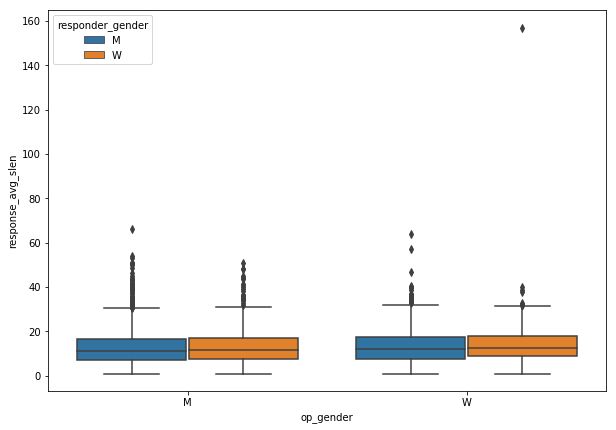

In [112]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender',
            data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_slen_bygender.png')

# show
plt.show()

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

#### Gender x Gender
There doesn't seem to be any significant difference between these, but let's take a look anyway.

Is any of this significant (though the differences are very small)?

In [113]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=-2.982217756382201, pvalue=0.0028660510810708875)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-0.8470930621960041, pvalue=0.3969549368298999)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-2.304286658358955, pvalue=0.021340634524923047)
-----------
ttest for male responder: Ttest_indResult(statistic=-3.3462540735900377, pvalue=0.0008463417155467567)
-----------
ttest for female responder: Ttest_indResult(statistic=-1.9540589886059885, pvalue=0.05146887763472309)


As expected, only a couple significant findings here. In summary:
- Female posters have longer sentences than male posters (though it's not as significant, and as we can see, the difference was very small)
- There is no significant difference in response sentence length to male vs. female posters
- Female responders have longer sentences than male responders (though it's not as significant, and as we can see, the difference was very small)
- Male responders use longer sentences when responding to females than when responding to males.
- There is no significant difference in sentence length for remale responders in response to male vs. female posters.

This file was sort of a mess though, since the significance seemed to change a lot with different samples. I'm just going to conclude (and stay on the safe side) that none of it is significant, since it changed between samples and was never a very low p-value to begin with.

In [114]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.0,2.931034,6.428571
181,181,2007scape,DCBizzle,M,False,puddin1,,unknown_gender,Just pm me your username and password and Ill ...,Username: Savaged Pw: <3ScriptKiddie,"[Just, pm, me, your, username, and, password, ...","[Username, :, Savaged, Pw, :, <, 3ScriptKiddie]",16,7,16.000000,7.0,1.533333,7.500000
233,233,2007scape,GUIpsp,M,False,ShadyRussian,,unknown_gender,Its not the best xp in the game by a long shot.,Best afkable melee XP. And when all other opti...,"[Its, not, the, best, xp, in, the, game, by, a...","[Best, afkable, melee, XP, ., And, when, all, ...",13,30,13.000000,15.0,1.250000,1.809524
238,238,2007scape,1stonepwn,M,False,Im_Blackice,,unknown_gender,Why are people surprised that they wont post i...,Because logic has no place in this sub.,"[Why, are, people, surprised, that, they, wont...","[Because, logic, has, no, place, in, this, sub...",21,9,21.000000,9.0,2.166667,1.500000
403,403,2007scape,Emperorerror,M,False,niggerslayer20,,unknown_gender,Wow so it would only be like 300 hours for 99,"only 300 hours of 2 tick woodcutting, lol.","[Wow, so, it, would, only, be, like, 300, hour...","[only, 300, hours, of, 2, tick, woodcutting, ,...",11,10,11.000000,10.0,1.333333,3.800000


In [115]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                39013.0  2.522047  1.458652  1.0  1.750000  2.236686   
W                10379.0  2.454628  1.444788  1.0  1.751943  2.179487   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.850746  20.0            38871.0  2.538747  1.666308  1.0   
W          2.727273  20.0            10346.0  2.433361  1.512209  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.684211  2.189189  2.849057  20.0  
W          1.666667  2.142857  2.740338  20.0

In [116]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35373.0  2.542000  1.679150  1.0  1.682927   
          M                  2729.0  2.524625  1.534624  1.0  1.709677   
          W                   769.0  2.439235  1.513679  1.0  1.689655   
W                            9347.0  2.445156  1.539445  1.0  1.666667   
          M                   733.0  2.263240  1.057203  1.0  1.644444   
          W                   266.0  2.487674  1.585617  1.0  1.803488   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.187500  2.857143  20.0  
          M                 2.200000  2.833333  20.0  
          W                 2.173333  2.666667  16.0  
W                           2.142857  2.750000  20.0  
          M                 2.095588  2.625000  16.0  
          W                 2.217857  2.765893  19.0

Again, about the same.

### TED linguistic analysis

In [117]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [118]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [119]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128
14,14,Aimee Mullins,W,Patrick,"Incredible, awe inspiring stuff. She should ha...","[Incredible, ,, awe, inspiring, stuff, ., She,...",21


average response length when "poster" is male: 94.46209262435677
average response length when "poster" is female: 91.30945890128046


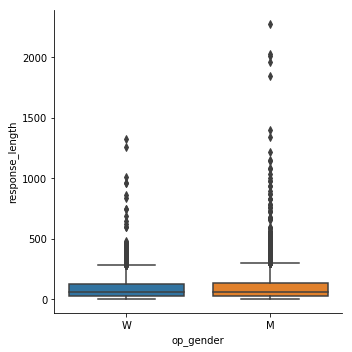

In [120]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when "poster" is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when "poster" is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are a little longer when the speaker is male than when they are female. Let's look at some more detail:

In [121]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37895.0,94.462093,98.370499,1.0,25.0,61.0,134.0,2275.0
W,12105.0,91.309459,93.038276,1.0,25.0,61.0,128.0,1326.0


In [122]:
# is this significant? do some t tests

stats.ttest_ind(ted_sample[ted_sample.op_gender == 'M'].response_length,
                ted_sample[ted_sample.op_gender == 'W'].response_length,
                equal_var=False)

Ttest_indResult(statistic=3.200283130478099, pvalue=0.0013749276831344624)

This seems to be significant, though it was not significant with a previous sample. Again, we run into an issue with discrepencies between samples. It's probably easier to conclude that there is no significant difference in response length given op_gender.

Let's look at sentence length:

In [123]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [124]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [125]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58,11.600000
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667
14,14,Aimee Mullins,W,Patrick,"Incredible, awe inspiring stuff. She should ha...","[Incredible, ,, awe, inspiring, stuff, ., She,...",21,10.500000


In [126]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37895.0,18.594278,13.336213,1.0,11.333333,17.0,23.0,399.0
W,12105.0,18.108841,12.355838,1.0,11.000000,16.5,22.5,333.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker. Let's not bother doing a ttest here.

In [127]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000,1.312500
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000,2.179487
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58,11.600000,1.800000
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667,2.160000
14,14,Aimee Mullins,W,Patrick,"Incredible, awe inspiring stuff. She should ha...","[Incredible, ,, awe, inspiring, stuff, ., She,...",21,10.500000,3.882353


In [128]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37634.0,2.259653,0.979346,1.0,1.787879,2.103774,2.488372,20.0
W,12018.0,2.278760,1.039348,1.0,1.789474,2.101228,2.500000,20.0


And once again, the google k-band doesn't really differ between genders.

## Linguistic difference in gender

Now let's get to some specifics! What about the content of someone's speech/writing makes it more likely for them to be male vs. female? There are some basic differences that have been noted, that I found in *Women, Men, and Language: A sociolinguistic account of gender differences in language*, by Jennifer Coates. There are a lot of differences that Coates discusses regarding gendered speak. Some only apply to actual speech, which is irrelevant in this case, and some require more exchanges other than a simple post/response. I'm gathering a short list of differences that I think would be manageable to investigate for my project:

- Hedges: Hedges express uncertainty, and overall, women seem to use more hedges than men. Some examples of hedges include I think, I guess, I mean, kind of, I’m sure, you know, sort of, perhaps, etc.
- Compliments: It was found that women give and receive more compliments than men. In a study of 484 exchanges of compliments, 51% were woman to woman, 9% were man to man, 23.1% were man to woman, and 16.5% were woman to man. This could also be related to politeness.
    - Unsure how to look at this though.
- Questions: Typically, women use questions to "avoid the role of expert," found in phrases such as "do you?", "aren't there?", "isn't it?", "right?", etc. On the other hand, men use questions to seek new information or introduce a new topic.

Let's look at the presence of these in our sample files.

In [139]:
# list of hedges
hedges = ['i think', 'i guess', 'i mean', 'kind of', "i'm sure", 'you know', 'sort of', 'perhaps', 'maybe']

# create function
def find_hedges(text):
    text = text.lower()
    num = 0
    for hedge in hedges:
        num = num + text.count(hedge)
    return num

In [140]:
# test function
print(find_hedges('I guess!'))
print(find_hedges('I think you know that I sort of'))
print(find_hedges("Perhaps I'm SURE"))

1
3
2


In [141]:
# unsure how to find compliments

# let's just look at a few examples of questions specific to females
# used to have 'right' but it seemed to be skewing the data
# and people use it too often for it to really qualify as a question
questions = ['do you?', "don't you?", "aren't there?", "isn't it?"]

# create function
def find_questions(text):
    text = text.lower()
    num = 0
    for ques in questions:
        num = num + text.count(ques)
    return num

In [142]:
# test function
print(find_questions("I like this don't you?"))
print(find_questions('rIGHT???'))
print(find_questions("This is cool, isn't it? I like this, do you?"))

1
0
2


### Facebook Congress

#### Hedges

In [143]:
# hedges in facebook congress (since we don't know responder gender, hedges for them don't really matter)
fb_congress_sample['post_hedges'] = fb_congress_sample.post_text.map(find_hedges)

fb_congress_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37460.0,0.033716,0.228652,0.0,0.0,0.0,0.0,7.0
W,12540.0,0.054785,0.276028,0.0,0.0,0.0,0.0,4.0


In [144]:
# male posters with hedges
male_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.027389215162840364
percentage female posters with hedges: 0.04505582137161084


So there seems to be a little more hedges in posts from women! Is this significant?

In [145]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_hedges,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_hedges,
                equal_var=False)

Ttest_indResult(statistic=-7.707855454763268, pvalue=1.3435366259967168e-14)

Cool - so even though hedges, aren't present that often, this is still statistically significant that females use more hedges than males!

#### Questions

In [146]:
fb_congress_sample['post_questions'] = fb_congress_sample.post_text.map(find_questions)

fb_congress_sample.groupby('op_gender')['post_questions'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37460.0,0.000427,0.020663,0.0,0.0,0.0,0.0,1.0
W,12540.0,0.000239,0.015466,0.0,0.0,0.0,0.0,1.0


In [147]:
# male posters with questions
male_questions = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_questions != 0)]

# female posters with questions
female_questions = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with questions: 0.0004271222637479979
percentage female posters with questions: 0.00023923444976076556


In [148]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_questions,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_questions,
                equal_var=False)

Ttest_indResult(statistic=1.0763333459309927, pvalue=0.2817872845155737)

So the questions aren't significant. This is difficult because it's hard to come up with questions that would be most likely to be used in an "avoiding the role of expert" context.

### Facebook Wiki

#### Hedges

In [149]:
# hedges in facebook wiki
fb_wiki_sample['post_hedges'] = fb_wiki_sample.post_text.map(find_hedges)

fb_wiki_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16577.0,0.050431,0.263835,0.0,0.0,0.0,0.0,4.0
W,33423.0,0.027556,0.223508,0.0,0.0,0.0,0.0,7.0


In [150]:
# male posters with hedges
male_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.042347831332569225
percentage female posters with hedges: 0.023008108188971668


This time, male posters seem to have more hedges. Is this significant though?

In [151]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_hedges,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_hedges,
                equal_var=False)

Ttest_indResult(statistic=9.586697333784663, pvalue=9.804071538309815e-22)

Yes - it is significant that male posters in fb_wiki_sample use more hedges than female posters. So this contradicts my hypothesis :(

#### Questions

In [152]:
fb_wiki_sample['post_questions'] = fb_wiki_sample.post_text.map(find_questions)

fb_wiki_sample.groupby('op_gender')['post_questions'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16577.0,0.000965,0.031053,0.0,0.0,0.0,0.0,1.0
W,33423.0,0.000150,0.014471,0.0,0.0,0.0,0.0,2.0


In [153]:
# male posters with questions
male_questions = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_questions != 0)]

# female posters with questions
female_questions = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with questions: 0.0009651927369246547
percentage female posters with questions: 0.0001196780660024534


In [154]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_questions,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_questions,
                equal_var=False)

Ttest_indResult(statistic=3.2129502321124863, pvalue=0.001315848704003857)

Now, it's seemingly significant that male posters use more of these questions, but I still don't have faith in these results since they appear so infrequently to begin with.

### Fitocracy

#### Hedges

In [155]:
# hedges in fitocracy
fitocracy_sample['post_hedges'] = fitocracy_sample.post_text.map(find_hedges)
fitocracy_sample['response_hedges'] = fitocracy_sample.response_text.map(find_hedges)

print(fitocracy_sample.groupby('op_gender')['post_hedges'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27201.0  0.033749  0.196384  0.0  0.0  0.0  0.0  6.0
W          22799.0  0.036405  0.200642  0.0  0.0  0.0  0.0  3.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24497.0  0.043801  0.219479  0.0  0.0  0.0  0.0  3.0
W                 25503.0  0.031094  0.189144  0.0  0.0  0.0  0.0  4.0


In [156]:
# male posters with hedges
male_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') & (fitocracy_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.031359141208043825
percentage female posters with hedges: 0.03394885740602658
percentage male responders with hedges: 0.04078050373515124
percentage female responders with hedges: 0.02858487236795671


This time, female posters have more hedges than male posters, but male responders have more hedges than female responders. Is this significant?

In [157]:
print('ttest for hedges in posts:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_hedges,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_hedges,
                      equal_var=False))
print('----------')
      
print('ttest for hedges in responses:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_hedges,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_hedges,
                      equal_var=False))

ttest for hedges in posts: Ttest_indResult(statistic=-1.48876452995756, pvalue=0.13655594031700363)
----------
ttest for hedges in responses: Ttest_indResult(statistic=-0.3564608826098189, pvalue=0.7214970057558134)


Thus, neither of these are significant. Note that it was significant that female posters used more hedges with a previous sample, but again, we'll have to stay on the safe side and assume it isn't significant.

#### Questions

In [158]:
# questions in fitocracy
fitocracy_sample['post_questions'] = fitocracy_sample.post_text.map(find_questions)
fitocracy_sample['response_questions'] = fitocracy_sample.response_text.map(find_questions)

print(fitocracy_sample.groupby('op_gender')['post_questions'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_questions'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27201.0  0.000221  0.014851  0.0  0.0  0.0  0.0  1.0
W          22799.0  0.000132  0.011471  0.0  0.0  0.0  0.0  1.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24497.0  0.000490  0.022128  0.0  0.0  0.0  0.0  1.0
W                 25503.0  0.000196  0.014001  0.0  0.0  0.0  0.0  1.0


In [159]:
# male posters with questions
male_questions_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') &
                                       (fitocracy_sample.post_questions != 0)]
# male responders with questions
male_questions_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') &
                                           (fitocracy_sample.response_questions != 0)]

# female posters with questions
female_questions_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') &
                                         (fitocracy_sample.post_questions != 0)]
# female responders with questions
female_questions_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') &
                                             (fitocracy_sample.response_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with questions:',
      len(male_questions_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with questions:',
      len(female_questions_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with questions: 0.00022058012573067168
percentage female posters with questions: 0.00013158471862801
percentage male responders with questions: 0.0004898559007225374
percentage female responders with questions: 0.00019605536603536838


In [160]:
print('ttest for questions in posts:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_questions,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_questions,
                      equal_var=False))
print('----------')
      
print('ttest for questions in responses:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_questions,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_questions,
                      equal_var=False))

ttest for questions in posts: Ttest_indResult(statistic=0.7554260065127851, pvalue=0.4499969956297185)
----------
ttest for questions in responses: Ttest_indResult(statistic=1.9032894513886478, pvalue=0.0570090533144603)


Again, neither are signficant.

### Reddit

#### Hedges

In [161]:
# hedges in reddit
reddit_sample['post_hedges'] = reddit_sample.post_text.map(find_hedges)
reddit_sample['response_hedges'] = reddit_sample.response_text.map(find_hedges)

print(reddit_sample.groupby('op_gender')['post_hedges'].describe())
print(reddit_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%   max
op_gender                                                       
M          39499.0  0.128358  0.419390  0.0  0.0  0.0  0.0  10.0
W          10501.0  0.173412  0.502111  0.0  0.0  0.0  0.0   8.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
                  45443.0  0.130075  0.415527  0.0  0.0  0.0  0.0  8.0
M                  3511.0  0.147251  0.444937  0.0  0.0  0.0  0.0  6.0
W                  1046.0  0.175908  0.468769  0.0  0.0  0.0  0.0  4.0


In [162]:
# male posters with hedges
male_hedges_post = reddit_sample[(reddit_sample.op_gender == 'M') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit_sample[(reddit_sample.op_gender == 'W') & (reddit_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.10574951264588978
percentage female posters with hedges: 0.13789162936863156
percentage male responders with hedges: 0.1227570492737112
percentage female responders with hedges: 0.14531548757170173


This is what we like to see! In both categories (poster and responder), women use more hedges. Is this significant?

In [163]:
print('ttest for hedges in posts:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_hedges,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_hedges,
                      equal_var=False))
print('----------')
      
print('ttest for hedges in responses:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_hedges,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_hedges,
                      equal_var=False))

ttest for hedges in posts: Ttest_indResult(statistic=-8.44513078921305, pvalue=3.3200786795860194e-17)
----------
ttest for hedges in responses: Ttest_indResult(statistic=-4.255519473687336, pvalue=2.0980247559695226e-05)


Yay- both significant! For both posts and responses, female use more hedges than males. So my hypothesis is supported once more!

#### Questions

In [164]:
# questions in reddit
reddit_sample['post_questions'] = reddit_sample.post_text.map(find_questions)
reddit_sample['response_questions'] = reddit_sample.response_text.map(find_questions)

print(reddit_sample.groupby('op_gender')['post_questions'].describe())
print(reddit_sample.groupby('responder_gender')['response_questions'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          39499.0  0.000380  0.019484  0.0  0.0  0.0  0.0  1.0
W          10501.0  0.000476  0.021817  0.0  0.0  0.0  0.0  1.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
                  45443.0  0.000374  0.019338  0.0  0.0  0.0  0.0  1.0
M                  3511.0  0.000285  0.016877  0.0  0.0  0.0  0.0  1.0
W                  1046.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [165]:
# male posters with questions
male_questions_post = reddit_sample[(reddit_sample.op_gender == 'M') &
                                       (reddit_sample.post_questions != 0)]
# male responders with questions
male_questions_response = reddit_sample[(reddit_sample.responder_gender == 'M') &
                                           (reddit_sample.response_questions != 0)]

# female posters with questions
female_questions_post = reddit_sample[(reddit_sample.op_gender == 'W') &
                                         (reddit_sample.post_questions != 0)]
# female responders with questions
female_questions_response = reddit_sample[(reddit_sample.responder_gender == 'W') &
                                             (reddit_sample.response_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with questions:',
      len(male_questions_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with questions:',
      len(female_questions_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with questions: 0.0003797564495303679
percentage female posters with questions: 0.00047614512903533
percentage male responders with questions: 0.0002848191398461977
percentage female responders with questions: 0.0


In [166]:
print('ttest for questions in posts:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_questions,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_questions,
                      equal_var=False))
print('----------')
      
print('ttest for questions in responses:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_questions,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_questions,
                      equal_var=False))

ttest for questions in posts: Ttest_indResult(statistic=-0.4112402280831891, pvalue=0.6809021747315718)
----------
ttest for questions in responses: Ttest_indResult(statistic=2.3723005621612425, pvalue=0.017682819488601544)


It appears that it's more significant that male responders use more of these questions, but once again, I'm going to assume this is due to the obvious lack of questions present in the first place.

Lastly, we can't do our hedge analysis on our last file (TED) because the gender isn't listed for the responder.

## Machine Learning
Let's gather everything I want for machine learning!

I have two goals:
1. I want to analyze the text, regardless of whether it's poster or responder, and train to identify gender. To do this, I'll use my samples from before and combine them to suit my purpose.

In [167]:
# we don't know gender for responder in fb congress, only gather post data
fb_congress_posts_sample = fb_congress_sample[['op_gender', 'post_text','post_length','post_avg_slen',
                                               'post_hedges','post_questions']]

# we don't know gender for responder in fb wiki, only gather post data
fb_wiki_posts_sample = fb_wiki_sample[['op_gender', 'post_text','post_length','post_avg_slen',
                                       'post_hedges','post_questions']]

# we know gender for poster and responder in fitocracy
fit_posts_sample = fitocracy_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges',
                                     'post_questions']]
fit_responses_sample = fitocracy_sample[['responder_gender', 'response_text','response_length',
                                         'response_avg_slen','response_hedges','response_questions']]

# we know gender for poster and some responders in reddit
reddit_posts_sample = reddit_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges',
                                     'post_questions']]
reddit_responses_sample = reddit_sample[reddit_sample.responder_gender != ''][['responder_gender','response_text',
                                                                               'response_length','response_avg_slen',
                                                                               'response_hedges','response_questions']]

# we don't know gender for responder in TED

In [168]:
# merge them

# first, change column names
columns = ['gender', 'text', 'text_length', 'avg_slen', 'hedges', 'questions']
fb_congress_posts_sample.columns = columns
fb_wiki_posts_sample.columns = columns
fit_posts_sample.columns = columns
fit_responses_sample.columns = columns
reddit_posts_sample.columns = columns
reddit_responses_sample.columns = columns

# add source column
fb_congress_posts_sample['source'] = 'fb_congress_post'
fb_wiki_posts_sample['source'] = 'fb_wiki_post'
fit_posts_sample['source'] = 'fitocracy_post'
fit_responses_sample['source'] = 'fitocracy_response'
reddit_posts_sample['source'] = 'reddit_post'
reddit_responses_sample['source'] = 'reddit_response'

# facebook files will have duplicates because they have multiple responses per post
fb_congress_posts_sample = fb_congress_posts_sample.drop_duplicates()
fb_wiki_posts_sample = fb_wiki_posts_sample.drop_duplicates()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [169]:
# now merge them
all_posts_responses = pd.concat([fb_congress_posts_sample, fb_wiki_posts_sample, fit_posts_sample,
                                 fit_responses_sample, reddit_posts_sample, reddit_responses_sample],
                                ignore_index=True)

all_posts_responses.head()

,gender,text,text_length,avg_slen,hedges,questions,source
0,M,It's time to put Obama in the history books. W...,37,18.5,0,0,fb_congress_post
1,M,"Recently, President George H. and Barbara Bush...",28,14.0,0,0,fb_congress_post
2,M,"In Texas, we're proud to say Merry Christmas.",11,11.0,0,0,fb_congress_post
3,M,"Thanks Hollywood, but no thanks. #NeverHillary",9,4.5,0,0,fb_congress_post
4,M,"Tonight, Hillary Clinton will try to make Amer...",30,10.0,0,0,fb_congress_post


In [170]:
all_posts_responses.source.value_counts()

fitocracy_post        50000
fitocracy_response    50000
reddit_post           50000
fb_congress_post      27601
fb_wiki_post          19016
reddit_response        4557
Name: source, dtype: int64

Seems like it's merged well! Let's pickle it!

In [171]:
import pickle

all_posts_responses.to_pickle("all_posts_responses.pkl")

2. For deeper analysis, I want to focus on when we know the gender of the OP and the responder so I can analyze how people respond to different genders. Which files will work for this?
    - Fitocracy: genders are present for all posters/responders
    - Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [172]:
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [173]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78231 entries, 51026 to 1314987
Data columns (total 10 columns):
post_id                     78231 non-null int64
subreddit                   78231 non-null object
op_id                       78231 non-null object
op_gender                   78231 non-null object
op_gender_visible           78231 non-null bool
responder_id                78231 non-null object
responder_gender            78231 non-null object
responder_gender_visible    78231 non-null object
post_text                   78231 non-null object
response_text               78231 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 6.0+ MB


How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [174]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [175]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
51026,51026,Uphoria,M,QuixoticChemist,W,I agree with this. most guys wont think twice ...,I think theyre are a few males in my lab this ...,reddit
51028,51028,Uphoria,M,MobileD,M,I honestly wouldnt. There are two things to c...,Basically this. I would recommend holding off...,reddit
51029,51029,satinbirdy,W,ninjarxa,M,Such a classic question! Im not a guy but Ive ...,whenever you make contact with another person ...,reddit
51030,51030,phukka,M,BroccoliFarts,W,"If its a guy that you might see often, a co-wo...",He is a coworker but I only work with him thre...,reddit
51031,51031,BroccoliFarts,W,phukka,M,He is a coworker but I only work with him thre...,"Also, watch how he interacts with his other co...",reddit


In [176]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [177]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 7 columns):
op_id               396766 non-null object
op_gender           396766 non-null object
responder_id        396766 non-null object
responder_gender    396766 non-null object
post_text           396766 non-null object
response_text       396766 non-null object
source              396766 non-null object
dtypes: object(7)
memory usage: 21.2+ MB


In [178]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [179]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

In [180]:
# adding column for hedges
gender_visible_df['post_hedges'] = gender_visible_df.post_text.map(find_hedges)
gender_visible_df['response_hedges'] = gender_visible_df.response_text.map(find_hedges)

# adding column for questions
gender_visible_df['post_questions'] = gender_visible_df.post_text.map(find_questions)
gender_visible_df['response_questions'] = gender_visible_df.response_text.map(find_questions)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000,0,0,0,0
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000,0,0,0,0
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000,0,0,0,0
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000,0,0,0,0
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667,0,0,0,0


In [181]:
# look at some of the hedges
samples = gender_visible_df[gender_visible_df.response_hedges != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of hedges:', row.response_hedges)
    print('gender:', row.responder_gender)
    print('--------------')

text: Ill keep an eye out for more cholesterol stuff then! And I guess a good breakfast is better than a Fiber One bar. Btw thats how Ive been getting most of my fiber. Not the best source, but two of those gives me 70%, and I assume I get some from the rest of my food. I might benefit from a more direct source though.  I live in the Bay Area, and one can of tuna here in the supermarket is $2.50. I often get grossed out by the cans though and Im a competent enough cook to bake salmon or make tuna steaks, problem is, I want the better non-farmed cuts, no color added, and those are upwards of 18 dollars a pound. Waaaaay out of my meager budget.
number of hedges: 1
gender: M
--------------
text: I thought the same thing at first too, but then I move away from home and after a while, the feelings appeared. I could find my self in bed at night sleepless just missing mom and dad.  I think thats the way love is supposed to feel, like the feeling of missing someone. Thats the feeling I search 

In [182]:
# look at some of the questions
samples = gender_visible_df[gender_visible_df.response_questions != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of questions:', row.response_questions)
    print('gender:', row.responder_gender)
    print('--------------')

text: Good luck! And now you can log Insanity :-) Great, isn't it? Yaaaay. Good luck to you
number of questions: 1
gender: M
--------------
text: Whoa... that OHP is pretty heavy compared to the rest isn't it?
number of questions: 1
gender: M
--------------
text: No, because you talk about what you DO want, not about what you DONT want. You dont say: hey honey, I dont want a cat, ever, do you? Nobody has ever heard of that. Its not ligical, you could go on all day summing up everything you dont want. I dont know about that general societal norm, but I certainly dont know why I should act according to it. More people need to learn to think for themselves and do what they want to do, not what others expect them to do.
number of questions: 1
gender: M
--------------
text: Ouch, that sounds horrible!  I overdid calf raises a couple of times in the past and ended up walking on tiptoe for several days.  It was not a good thing.  It's so hard not to overdo, isn't it?
number of questions: 1
ge

Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [183]:
gender_visible_df.to_pickle("gender_visible_df.pkl")